<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


a. Load the dataset and perform exploratory data analysis (EDA).

In [ ]:
train_data = pd.read_csv("/content/Titanic_train.csv")
test_data = pd.read_csv('/content/Titanic_test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("Passenger in Orginal Data: ", len(train_data))

Passenger in Orginal Data:  891


b. Examine the features, their types, and summary statistics.

In [ ]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
test_data.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


For categorical columns

In [ ]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features|

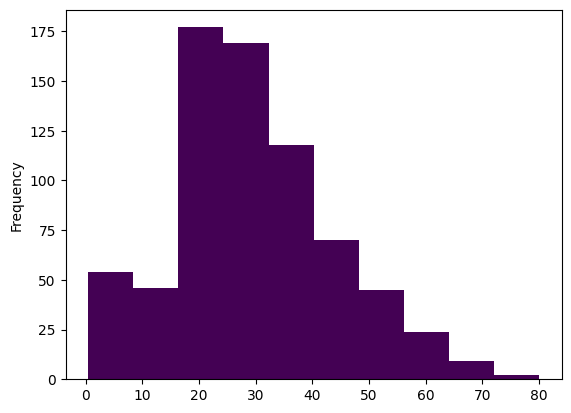

In [ ]:
train_data['Age'].plot(kind = "hist", colormap="viridis")
plt.show()



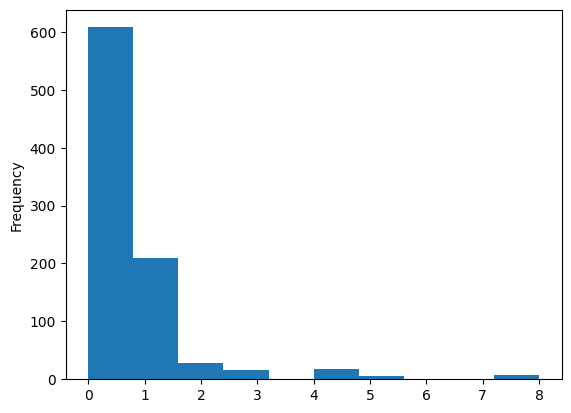

In [ ]:
train_data['SibSp'].plot.hist()
plt.show()

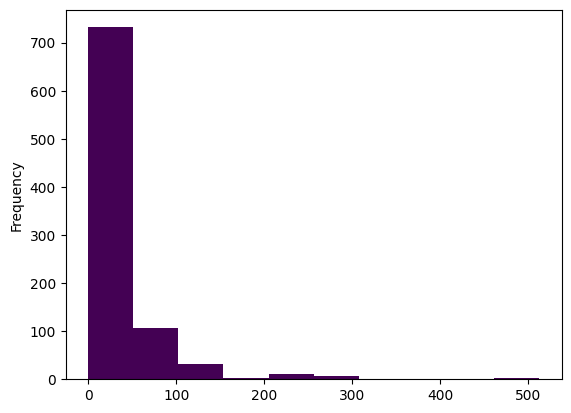

In [ ]:
train_data['Fare'].plot(kind = "hist", colormap="viridis")
plt.show()

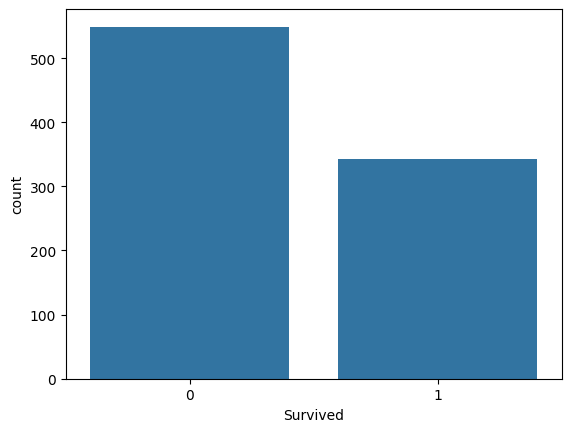

In [ ]:
sns.countplot(x = "Survived", data = train_data)
plt.show()

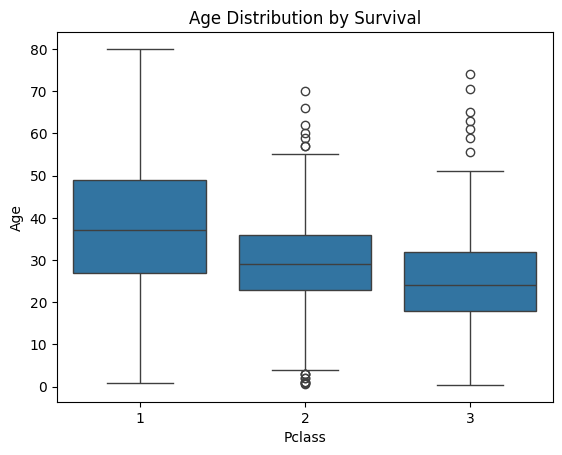

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title("Age Distribution by Survival")
plt.show()

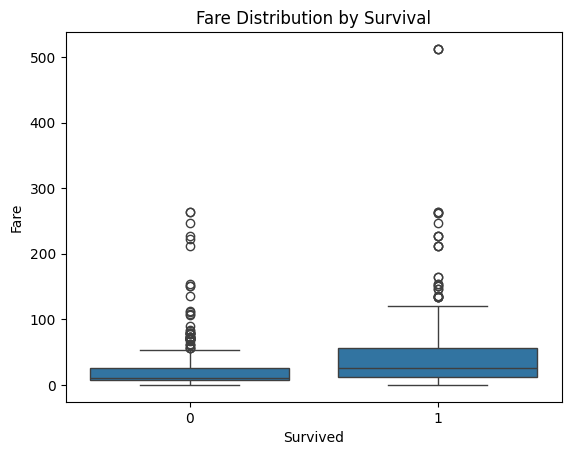

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=train_data)
plt.title("Fare Distribution by Survival")
plt.show()

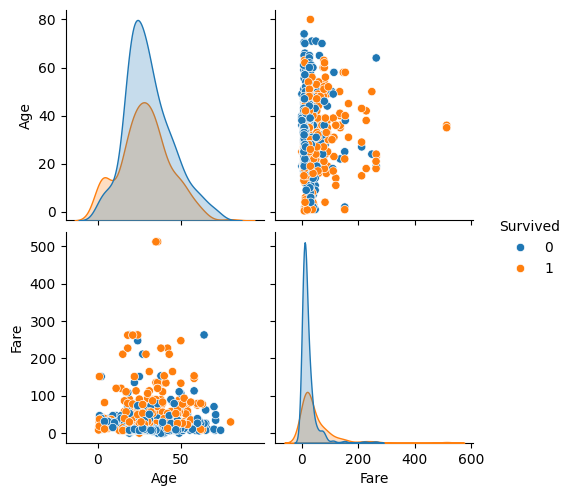

In [ ]:
sns.pairplot(train_data[['Survived','Age','Fare']], hue='Survived')
plt.show()

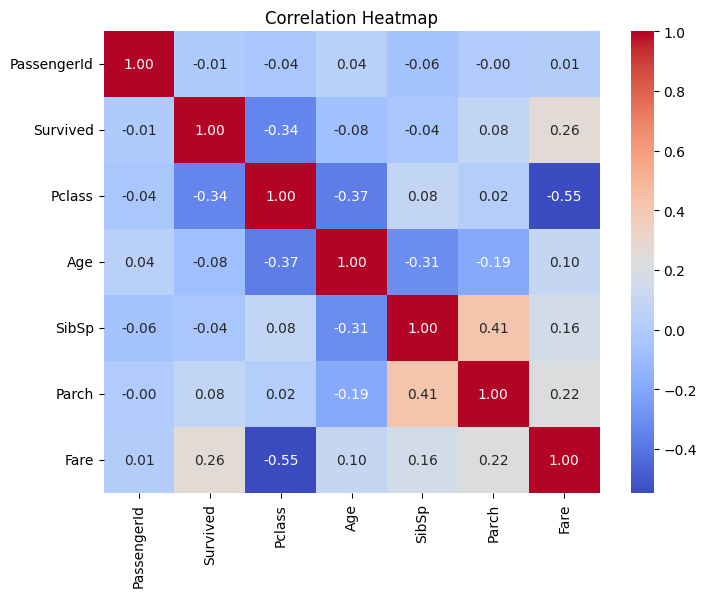

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot = True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data.fillna(train_data.mean(numeric_only=True), inplace=True)

In [ ]:
train_data['Fare'].fillna(0, inplace=True)

/tmp/ipython-input-1109506842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fare'].fillna(0, inplace=True)


In [ ]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-47354518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [ ]:
train_data['Cabin'].fillna("Unknown", inplace=True)

/tmp/ipython-input-3476187563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna("Unknown", inplace=True)


In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data.drop(['Ticket', 'Cabin'], axis = 1, inplace=True)

b. Encode categorical variables.

In [ ]:
colname = []
for col in train_data.columns:
    if train_data[col].dtype == "object":
        colname.append(col)
colname

['Name', 'Sex', 'Embarked']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
    train_data[x] = le.fit_transform(train_data[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Features: ", x)
    print("mapping: ", le_name_mapping)

Features:  Name
mapping:  {'Allen, Miss. Elisabeth Walton': np.int64(0), 'Allison, Master. Hudson Trevor': np.int64(1), 'Allison, Miss. Helen Loraine': np.int64(2), 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)': np.int64(3), 'Anderson, Mr. Harry': np.int64(4), 'Andrews, Miss. Kornelia Theodosia': np.int64(5), 'Andrews, Mr. Thomas Jr': np.int64(6), 'Appleton, Mrs. Edward Dale (Charlotte Lamson)': np.int64(7), 'Astor, Mrs. John Jacob (Madeleine Talmadge Force)': np.int64(8), 'Aubart, Mme. Leontine Pauline': np.int64(9), 'Ball, Mrs. (Ada E Hall)': np.int64(10), 'Barkworth, Mr. Algernon Henry Wilson': np.int64(11), 'Baxter, Mr. Quigg Edmond': np.int64(12), 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)': np.int64(13), 'Bazzani, Miss. Albina': np.int64(14), 'Becker, Master. Richard F': np.int64(15), 'Becker, Miss. Marion Louise': np.int64(16), 'Beckwith, Mr. Richard Leonard': np.int64(17), 'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)': np.int64(18), 'Beesley, Mr. Lawrence': np.in

In [ ]:
print(train_data.head())

    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch     Fare  \
1             2         1       1    49    0  38.0      1      0  71.2833   
3             4         1       1    70    0  35.0      1      0  53.1000   
6             7         0       1   112    1  54.0      0      0  51.8625   
10           11         1       3   148    0   4.0      1      1  16.7000   
11           12         1       1    27    0  58.0      0      0  26.5500   

    Embarked  
1          0  
3          2  
6          2  
10         2  
11         2  


In [ ]:
train_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


## 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [ ]:
x = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)


In [ ]:
print("X_Train", x_train.shape)
print("X_Test", x_test.shape)
print("Y_Train", y_train.shape)
print("Y_Test", y_test.shape)

X_Train (146, 9)
X_Test (37, 9)
Y_Train (146,)
Y_Test (37,)


b. Train the model using the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logmodel.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

## 4. Model Evaluation:

In [ ]:
y_pred_proba = logmodel.predict_proba(x_test)[:, 1]

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


Accuracy Score:  75.67567567567568
Precision_Recall_Curve: (array([0.72972973, 0.82142857, 1.        ]), array([1.        , 0.85185185, 0.        ]), array([0, 1]))
Recall Score:  0.8518518518518519
F1_Score : 0.8363636363636363
ROC-AUC Score : 0.874074074074074


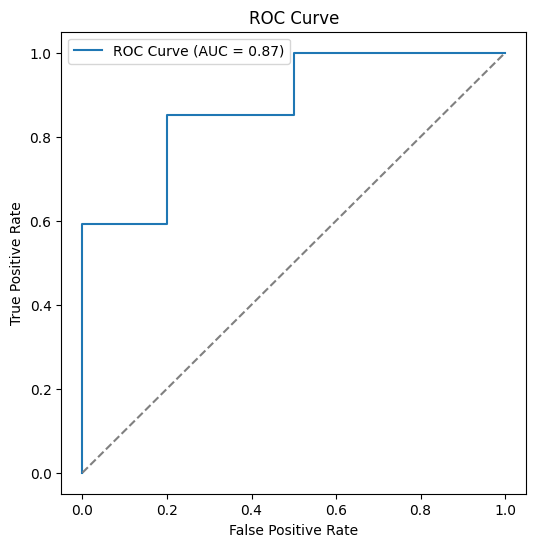

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, roc_curve
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy Score: ", acc)
precision = precision_recall_curve(y_test, y_pred)
print("Precision_Recall_Curve:", precision)
recall = recall_score(y_test,y_pred)
print("Recall Score: ", recall)
print("F1_Score :", f1_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score :" , roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#plt.figure(figsize=(6,6))
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



# 5. INTERPRETATION OF LOGISTIC REGRESSION
a. Model Coefficients

In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Feature,Coefficient
2,Fare,0.002584
1,Age,-0.030549
4,Parch,-0.108346
6,Embarked_Q,-0.112720
3,SibSp,-0.295070
7,Embarked_S,-0.399829
0,Pclass,-0.937531
5,Sex_male,-2.591069


Interpretation

Positive coefficient → increases survival probability

Negative coefficient → decreases survival probability

Example:

Sex_male (-) → males less likely to survive

Fare (+) → higher fare → better survival

Pclass (-) → lower class → lower survival

#6. DEPLOYMENT WITH STREAMLIT

Save the Model

In [ ]:
import joblib
joblib.dump(model, "logistic_model.pkl")


['logistic_model.pkl']

Streamlit App (app.py)

In [ ]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load("logistic_model.pkl")

st.title("Titanic Survival Prediction")

pclass = st.selectbox("Passenger Class", [1,2,3])
age = st.slider("Age", 1, 80)
fare = st.number_input("Fare", min_value=0.0)
sibsp = st.number_input("Siblings/Spouses", min_value=0)
parch = st.number_input("Parents/Children", min_value=0)
sex = st.selectbox("Sex", ["Male", "Female"])

embarked = st.selectbox("Embarked", ["S", "Q", "C"])

sex_male = 1 if sex == "Male" else 0
emb_q = 1 if embarked == "Q" else 0
emb_s = 1 if embarked == "S" else 0

features = np.array([[pclass, age, fare, sibsp, parch, sex_male, emb_q, emb_s]])

if st.button("Predict"):
    prediction = model.predict(features)
    probability = model.predict_proba(features)[0][1]

    if prediction[0] == 1:
        st.success(f"Survived (Probability: {probability:.2f})")
    else:
        st.error(f"Did Not Survive (Probability: {probability:.2f})")


2026-01-13 10:58:19.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-13 10:58:19.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

#Run Locally

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.94.236:8501

  Stopping...


**INTERVIEW QUESTIONS (IMPORTANT)**

1. Difference between Precision and Recall?

Precision

Out of all predicted positives, how many are actually positive?

Recall

Out of all actual positives, how many did we correctly predict?

Example:

Precision → important when false positives are costly

Recall → important when false negatives are costly (e.g., disease detection)

2. What is Cross-Validation & Why Important?


Cross-Validation:

Splits data into multiple folds

Trains & tests model multiple times


Why Important?

Reduces overfitting

Gives more reliable performance estimates

Ensures model generalizes well